In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime
from datetime import timedelta
import math
import random 
import timeit

In [2]:
brm = pd.read_csv("../generated/brm_cleaned.csv")
frb = pd.read_csv("../generated/frb_cleaned.csv")

In [3]:
def timedelta_to_hours(frame):
    frame["hours"]=frame["time"].map(lambda x:int(x[0:2]))
    return frame
def split_seasons(frame, season):
    if season == "spring":
        frame_spring =  frame[(frame['day'] >= "2019-03-01") & (frame['day'] <= "2019-05-31")]
        return frame_spring
    elif season == "summer":
        frame_summer =  frame[(frame['day'] >= "2019-06-01") & (frame['day'] <= "2019-09-31")] 
        return frame_summer
    elif season == "fall":
        frame_fall   =  frame[(frame['day'] >= "2019-09-01") & (frame['day'] <= "2019-11-30")]
        return frame_fall
    elif season == "winter":
        frame_winter =  frame[(frame['day'] >= "2019-12-01") & (frame['day'] <= "2020-01-20")]
        return frame_winter
def to_float(frame):
    frame['orig_lat'] = frame['orig_lat'].astype(float)
    frame['orig_lng'] = frame['orig_lng'].astype(float)
def create_map(x,y):
    empty_map = folium.Map(location = [x, y],
                          tiles ='Stamen Toner',
                           zoom_start = 13)
    return empty_map
def to_lat_long_list(frame_season):
    list_season = [[[row['orig_lat'],row['orig_lng']] for index,
              row in frame_season[frame_season['hours'] == i].iterrows()]
             for i in range(0,23)]
    return list_season
def plot(list_season, empty_map):
    heat_map = plugins.HeatMapWithTime(list_season,auto_play=False,max_opacity=0.8)
    heat_map.add_to(empty_map)
def trip_duration_to_hours(timedelta_array):
    return timedelta_array.map(lambda x: x / pd.Timedelta("1 hour"))
def plot_hist(filename, city):
    plt.figure() 
    plt.hist(filename)
    plt.title('Average usage per bike in ' + city) 
    plt.xlabel('Average hours driven')
    plt.ylabel('Number of bikes')

In [4]:
brm = timedelta_to_hours(brm)
frb = timedelta_to_hours(frb)

In [5]:
to_float(brm)
to_float(brm)

In [6]:
frb["trip_duration"] = trip_duration_to_hours(frb["trip_duration"])
brm["trip_duration"] = trip_duration_to_hours(brm["trip_duration"])

In [7]:
brm

Unnamed: 0         day      time  b_number    city  trip_duration  \
0                0  2019-06-14  22:30:00     20507  bremen       0.133333   
1                1  2019-06-28  13:07:00     20507  bremen       0.816667   
2                2  2019-06-28  15:01:00     20507  bremen       0.816667   
3                3  2019-07-09  12:03:00     20507  bremen       0.216667   
4                4  2019-07-09  12:23:00     20507  bremen       0.233333   
...            ...         ...       ...       ...     ...            ...   
116232      116232  2019-11-17  16:37:00     20999  bremen       0.133333   
116233      116233  2019-11-17  18:39:00     20999  bremen       0.083333   
116234      116234  2019-11-18  09:23:00     20999  bremen       0.150000   
116235      116235  2019-11-19  15:35:00     20999  bremen       0.716667   
116236      116236  2019-11-21  17:45:00     20999  bremen       0.183333   

         orig_lat  orig_lng   dest_lat  dest_lng  distance  hours  
0       53.078923  8.884911  53.074731  8.876003  0.755886     22  
1       53.078923  8.884911  53.073298  8.794316  6.084054     13  
2       53.073529  8.794269  53.077716  8.897971  6.943062     15  
3       53.078923  8.884911  53.067440  8.864807  1.853136     12  
4       53.067418  8.864802  53.078923  8.884911  1.855081     12  
...           ...       ...        ...       ...       ...    ...  
116232  53.072835  8.814104  53.072084  8.828756  0.982436     16  
116233  53.072071  8.828776  53.070533  8.821335  0.525679     18  
116234  53.070369  8.821749  53.079360  8.813848  1.130559      9  
116235  53.079591  8.813925  53.145093  8.910599  9.730569     15  
116236  53.145798  8.909947  53.158160  8.945250  2.726051     17  

[116237 rows x 12 columns]

### Summer in Freiburg 

In [8]:
frb_summer = split_seasons(frb, "summer")
frb_map_summer = create_map(48.3669, 7.1485)
frb_heat_data_summer = to_lat_long_list(frb_summer)
plot(frb_heat_data_summer, frb_map_summer)
frb_map_summer

### Winter in Freiburg 

In [9]:
frb_winter = split_seasons(frb, "winter")
frb_map_winter = create_map(48.3669, 7.1485)
frb_heat_data_winter = to_lat_long_list(frb_winter)
plot(frb_heat_data_winter, frb_map_winter)
frb_map_winter

### Spring in Freiburg

In [10]:
frb_spring = split_seasons(frb, "spring")
frb_map_spring = create_map(48.3669, 7.1485)
frb_heat_data_spring = to_lat_long_list(frb_spring)
plot(frb_heat_data_spring, frb_map_spring)
frb_map_spring

### Autumn in Freiburg

In [11]:
frb_fall = split_seasons(frb, "fall")
frb_map_fall = create_map(48.3669, 7.1485)
frb_heat_data_fall = to_lat_long_list(frb_fall)
plot(frb_heat_data_fall, frb_map_fall)
frb_map_fall

### Summer in Bremen

In [12]:
brm_summer = split_seasons(brm, "summer")
brm_map_summer = create_map(53.8299, 7.7985)
brm_heat_data_summer = to_lat_long_list(brm_summer)
plot(brm_heat_data_summer, brm_map_summer)
brm_map_summer

### Winter in Bremen 

In [13]:
brm_winter = split_seasons(brm, "winter")
brm_map_winter = create_map(53.8299, 7.7985)
brm_heat_data_winter = to_lat_long_list(brm_winter)
plot(brm_heat_data_winter, brm_map_winter)
brm_map_winter

### Spring in Bremen

In [14]:
brm_spring = split_seasons(brm, "spring")
brm_map_spring = create_map(53.8299, 7.7985)
brm_heat_data_spring = to_lat_long_list(brm_spring)
plot(brm_heat_data_spring, brm_map_spring)
brm_map_spring

### Autumn in Bremen 

In [15]:
brm_fall = split_seasons(brm, "fall")
brm_map_fall = create_map(53.8299, 7.7985)
brm_heat_data_fall = to_lat_long_list(brm_fall)
plot(brm_heat_data_fall, brm_map_fall)
brm_map_fall

 -Calculate hourly KPIs for the two cities in your dataset and visualize them over time. 
 -Which trends do you observe?
 -How do you explain them? 
 –Find explanations for any diﬀerences between cities. Which city performs better/worse and why? 
    
    The density-KPI is more or less mirroring the commuting patterns of our clients. In the morning interval (7:00 - 10:00) there is a clear movement from the populated outskirt towards the city-center. An assumption can be made that this is due to the large number of people traveling to work or school. 
    In the middle of the day (12:00 - 14:00) the activity is concentrated in the city area. We can interpret that as people running errands in their lunch breaks or in general.
    The last clear observation takes place in the time period from around 17:00 until the end of the day and it shows the traffic leading out of the city.
    By taking the small hours of the morning into consideration, which are leading to the initial statement made about the morning-commutes, this closes a full circle.
    
    
    

In [16]:
df_brm = brm.groupby(['b_number'])['trip_duration'].agg(lambda x: x.unique().mean())
df_frb = frb.groupby(['b_number'])['trip_duration'].agg(lambda x: x.unique().mean())


C:\Users\Velichka\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
C:\Users\Velichka\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Velichka\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice.
  


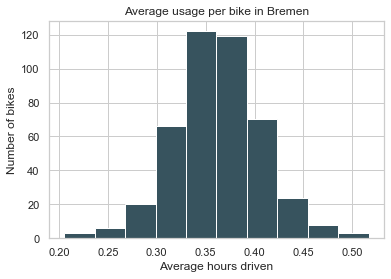

In [20]:
plot_hist(df_brm, "Bremen")

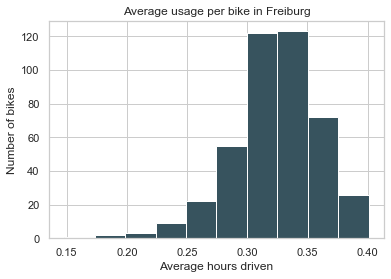

In [19]:
plot_hist(df_frb, "Freiburg")